# Examples from Chapter 1 of PRML - Christopher Bishop

**Author:** Suresh Venkatesan

# Import required libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from prml.preprocess.polynomial import PolynomialFeature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Section 1.1: Polynomial Curve Fitting

## Generate synthetic data - Ground-truth and training dataset

**Ref:** Appendix A. Data Sets. Synthetic Data, Pg. 682 - 683

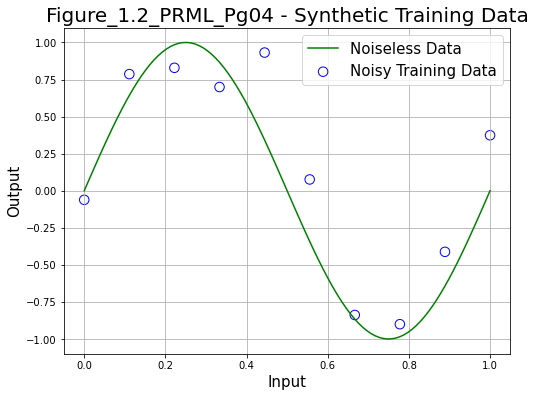

In [117]:
# Define functions
def sine_func(x): # Function to generate a noiseless sine wave
    return np.sin(2 * np.pi * x)

def noiseless_data(func, num_samp): # Generate synthetic noiseless data for baseline
    x = np.linspace(0, 1, num_samp) # Generate inputs
    y = func(x) # Generate noiseless output
    return x, y

def synth_regn_data(func, num_samp, std_dev): # Generate synthetic data for regression
    x = np.linspace(0, 1, num_samp) # Generate inputs
    y_noiseless = func(x) # Generate noiseless output
    noise = np.random.normal(scale = std_dev, size = num_samp) # Gaussian random noise with 
                                                               # zero mean and standard-devn = std_dev
    y = y_noiseless + noise # Generate final noisy output
    return x, y

np.random.seed(seed = 12345) # Set random seed

# Generate underlying ground-truth data
X_orig, y_orig = noiseless_data(func, 100)

# Noise: std-dev = 0.3, variance = 0.9, precision (beta) = 11.111
# Refer Sec 1.2.4, Pg. 24 for definition of precision (beta)
# std-dev = 0.3 chosen as mentioned in Appendix A.
X_train, y_train = synth_reg_data(sine_func, 10, 0.3)

# Plot training set data
plt.figure(figsize = (8, 6))
plt.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
plt.scatter(X_train, y_train, facecolor = "none", edgecolor = 'b', s = 90,\
            label = 'Noisy Training Data')
plt.legend(fontsize = 15)
plt.title("Figure_1.2_PRML_Pg04 - Synthetic Training Data", fontsize = 20)
plt.xlabel("Input", fontsize = 15)
plt.ylabel("Output", fontsize = 15)
plt.grid(b = True)
plt.show()

## Generate synthetic data - Test dataset

Refer Pg. 6, last page of PRML for definition of test dataset. Use std-dev = 0.4 for test set.

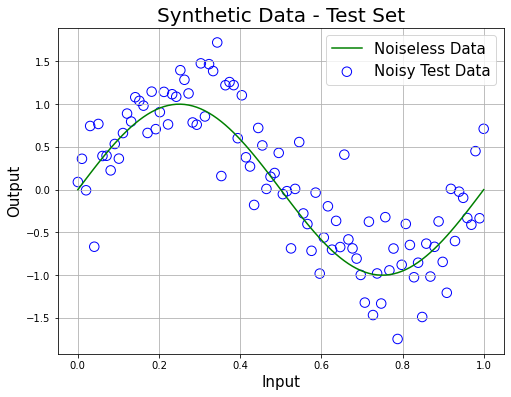

In [149]:
# Change random seed and generate test dataset
np.random.seed(seed = 54321) # Set random seed
X_test, y_test = synth_reg_data(sine_func, 100, 0.4)

# Plot test set data
plt.figure(figsize = (8, 6))
plt.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
plt.scatter(X_test, y_test, facecolor = "none", edgecolor = 'b', s = 90,\
            label = 'Noisy Test Data')
plt.legend(fontsize = 15)
plt.title("Synthetic Data - Test Set", fontsize = 20)
plt.xlabel("Input", fontsize = 15)
plt.ylabel("Output", fontsize = 15)
plt.grid(b = True)
plt.show()

## Perform polynomial regression

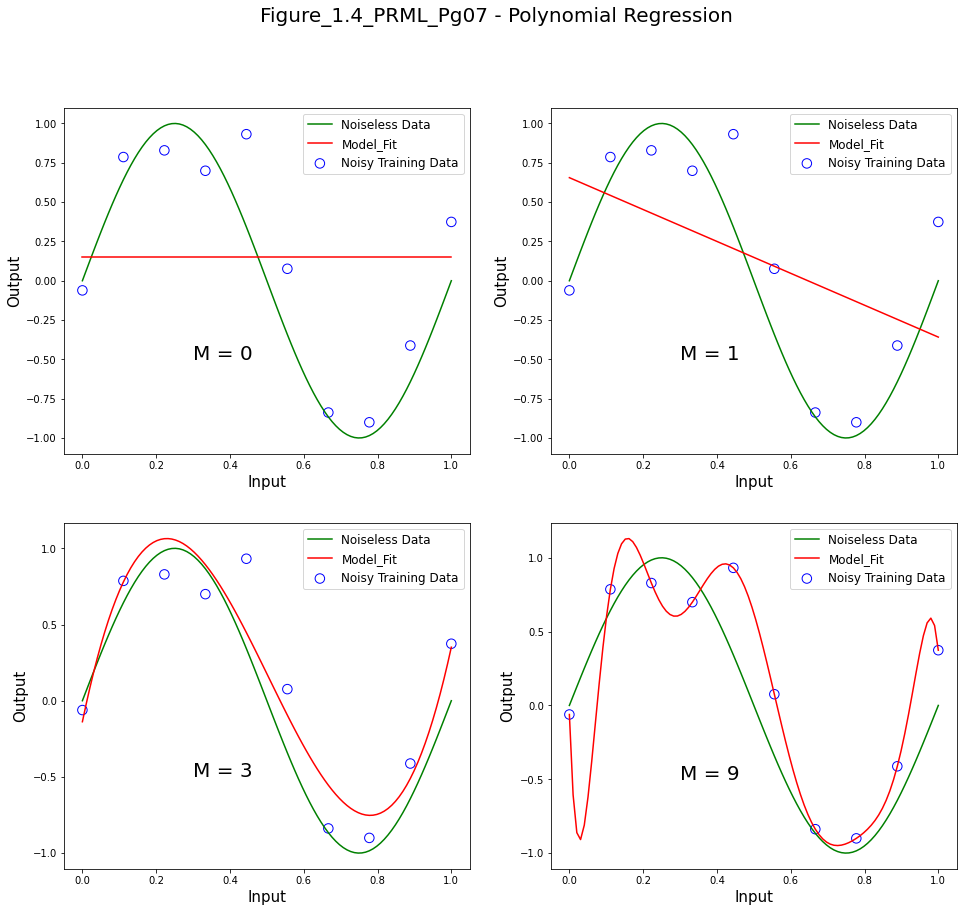

In [152]:
# Reshape features
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

fig = plt.figure(figsize = (16, 14))
fig.suptitle("Figure_1.4_PRML_Pg07 - Polynomial Regression", fontsize = 20)
degrees = list(range(10)) # List of polynomial orders to evaluate
degrees_plot = [0, 1, 3, 9] # List of polynomial orders to plot
rmse_train = [] # Placeholder to store RMSE values for training set
rmse_test = [] # Placeholder to store RMSE values for testing set
coef_list = [] # Placeholder to store coefficients of all models
axis_ind = 1 # Axis index to use while plotting

for deg in degrees: # Iterate through degrees
    # Define polynomial object with degree = deg
    poly = PolynomialFeatures(degree = deg, include_bias = True)
    # Fit polynomial object to X_train
    poly.fit(X_train)
    # Obtain polynomial transformation of X_train and X_orig
    X_train_poly = poly.transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Define Linear regression model
    reg = LinearRegression()
    # Fit Linear regression model to X_train_poly and y_train
    reg.fit(X_train_poly, y_train)
    # Add coefficients of current model to coef_list
    coef_list.append(reg.coef_)
    # Computer RMSE for training set and update rmse_train
    y_pred = reg.predict(X_train_poly)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    # Generate predictions for X_test_poly input
    y_pred = reg.predict(X_test_poly)
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    if deg in degrees_plot: # Plot only if deg is present in degrees_plot
        # Plot data
        ax = plt.subplot(2, 2, (axis_ind))
        ax.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
        plt.scatter(X_train, y_train, facecolor = "none", edgecolor = 'b', s = 90,\
                    label = 'Noisy Training Data')
        plt.plot(X_orig, y_pred, color = 'r', label = 'Model_Fit')
        plt.legend(fontsize = 12)
        plt.xlabel("Input", fontsize = 15)
        plt.ylabel("Output", fontsize = 15)
        plt.annotate(f"M = {deg}", xy = (0.3, -0.5), fontsize = 20)
        axis_ind += 1

plt.show()

## Plot training and test set RMSE

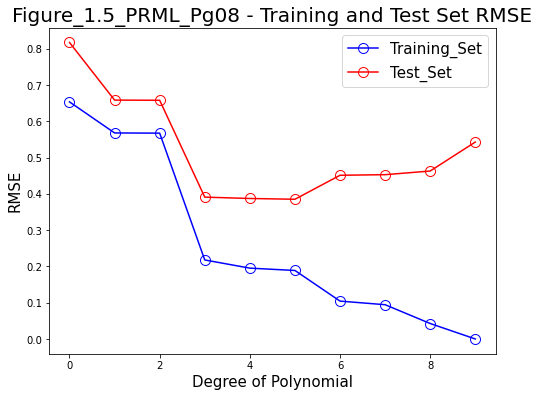

In [151]:
plt.figure(figsize = (8, 6))
plt.title("Figure_1.5_PRML_Pg08 - Training and Test Set RMSE", fontsize = 20)
plt.plot(rmse_train, 'o-', c = 'b', mfc = 'none', mec = 'b', ms = 10, label = 'Training_Set')
plt.plot(rmse_test, 'o-', c = 'r', mfc = 'none', mec = 'r', ms = 10, label = 'Test_Set')
plt.xlabel('Degree of Polynomial', fontsize = 15)
plt.ylabel('RMSE', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Table of coefficients for the various models

**Ref:** Table 1.1, Pg. 8 of PRML

In [178]:
coef_dict = {'M_0': np.pad(coef_list[0], pad_width = (0, 9)),
             'M_1': np.pad(coef_list[1], pad_width = (0, 8)),
             'M_2': np.pad(coef_list[2], pad_width = (0, 7)),             
             'M_6': np.pad(coef_list[6], pad_width = (0, 3)),
             'M_9': coef_list[9]}
index = ['W_'+ str(ind) for ind in range(10)]
coef_df = pd.DataFrame(coef_dict, index)
coef_df

,M_0,M_1,M_2,M_6,M_9
W_0,0.0,0.000000,0.000000,0.000000,0.000000
W_1,0.0,-1.013793,-0.731739,20.228480,-71.233159
W_2,0.0,0.000000,-0.282054,-179.207042,1881.657800
W_3,0.0,0.000000,0.000000,741.865423,-17173.968839
W_4,0.0,0.000000,0.000000,-1493.243700,79116.590616
W_5,0.0,0.000000,0.000000,1382.762347,-207880.026081
W_6,0.0,0.000000,0.000000,-471.983770,325061.420386
W_7,0.0,0.000000,0.000000,0.000000,-299561.835594
W_8,0.0,0.000000,0.000000,0.000000,150346.293557
W_9,0.0,0.000000,0.000000,0.000000,-31718.463344
